In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

2024-08-21 09:43:40.359067: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-21 09:43:40.359150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 09:43:40.359174: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-21 09:43:40.367125: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv('../newKDDTrain+.txt', header=None)

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
train_df.columns = columns

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
test_df = pd.read_csv('../newKDDTest+.txt', header=None)

test_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
test_df.columns = columns

test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [5]:
df = pd.concat([train_df, test_df])

In [6]:
df['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
22539     normal
22540     normal
22541    anomaly
22542     normal
22543    anomaly
Name: class, Length: 148517, dtype: object

In [7]:
df.isnull().values.any()

False

In [8]:
len(df.columns)

42

In [9]:
df.shape

(148517, 42)

In [10]:
# 'label' 열의 값이 'normal.'이면 0으로, 'normal.'이 아니면 1로 변경
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# 변경된 데이터프레임 확인
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [11]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])

# 인코딩된 데이터프레임 확인
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.

In [12]:
# 상관계수 계산
correlation_matrix = df.corr()
label_correlation = correlation_matrix['class'].drop('class')

# 상관계수가 높은 컬럼 선택
top_features = label_correlation.abs().sort_values(ascending=False).head(5).index  # 상위 5개 컬럼 선택



In [13]:
print(top_features)

Index(['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag'],
      dtype='object')


In [14]:
# ' Label' 컬럼과의 상관계수 계산
label_correlation = correlation_matrix['class'].drop('class')

# 상관계수가 0.4를 넘는 컬럼 선택
significant_features = label_correlation[abs(label_correlation) > 0.38]
print("Columns with correlation greater than 0.4 with 'Label':")
print(significant_features)

Columns with correlation greater than 0.4 with 'Label':
flag                       -0.629556
logged_in                  -0.664117
count                       0.524108
serror_rate                 0.588474
srv_serror_rate             0.586636
same_srv_rate              -0.708911
dst_host_srv_count         -0.692577
dst_host_same_srv_rate     -0.667624
dst_host_serror_rate        0.589936
dst_host_srv_serror_rate    0.593690
Name: class, dtype: float64


In [15]:
significant_features.sort_values().index

Index(['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag', 'count', 'srv_serror_rate', 'serror_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate'],
      dtype='object')

In [16]:
columns_list = ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'logged_in', 'flag', 'count', 'srv_serror_rate', 'serror_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'class']
df=df[columns_list]


In [17]:
df.shape

(148517, 11)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((133665, 11), (14852, 11))

In [19]:
X_train['class'].value_counts()

0    69334
1    64331
Name: class, dtype: int64

In [20]:
normal = X_train[X_train['class'] == 0]
normal.shape

(69334, 11)

In [21]:
X_test_normal = X_test[X_test['class']==0]
#X_test_normal.shpae

In [25]:
y_train = normal['class']
X_train_normal = normal.drop(labels='class', axis=1)

y_test = X_test['class']
X_test_normal = X_test.drop(labels='class', axis=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_normal)
scaler.fit(X_test_normal)

X_train_ft = scaler.transform(X_train_normal)
X_test_ft = scaler.transform(X_test_normal)

In [27]:
#reshape inputs for LSTM [samples, timesteps, features]

X_train_ft = X_train_ft.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
print("Training data shape:", X_train_ft.shape)

X_test_ft = X_test_ft.reshape(X_test_ft.shape[0], 1, X_test_ft.shape[1])
print("Test data shape:", X_test_ft.shape)


Training data shape: (69334, 1, 10)
Test data shape: (14852, 1, 10)


In [28]:
X_test = X_test.drop(labels='class',axis=1)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [29]:
y_train = np.array(y_train)
y_test = np.array(y_test)# Reshape the arrays as needed

y_train = y_train.reshape(X_train_ft.shape[0], 1, X_train_ft.shape[1])
print("Training data shape:", y_train.shape)

y_test = y_test.reshape(X_test.shape[0], 1, 1)
print("Test data shape:", y_test.shape)

Training data shape: (69334, 1, 1)
Test data shape: (14852, 1, 1)


In [30]:
X_train_ft.shape, X_test_ft.shape

((69334, 1, 10), (14852, 1, 10))

In [31]:
!pip install keras_self_attention

Defaulting to user installation because normal site-packages is not writeable


In [32]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Conv1D, Conv1DTranspose
from keras.models import Model
from keras import regularizers
from keras_self_attention import SeqWeightedAttention, SeqSelfAttention

In [33]:
latent_dim = 2
inter_dim = 3

def sampling(args):
    z_mean, z_log_sigma = args
    batch_size = tf.shape(z_mean)[0]
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.)
    return z_mean + z_log_sigma * epsilon

def vae_loss(x, x_decoded_mean, z_mean, z_log_sigma):
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    kl_loss = -0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    total_loss = K.mean(reconstruction_loss + kl_loss)
    return total_loss

def cvae(X):
    timesteps, features = X.shape[1], X.shape[2]
    input_x = Input(shape=(timesteps, features), name='InputTimeSeries')

    # intermediate dimension
    h = Conv1D(filters=64, kernel_size=3, padding="same", strides=1, activation="relu")(input_x)
    h = Conv1D(filters=32, kernel_size=3, padding="same", strides=1, activation="relu")(h)
    h = Conv1D(filters=16, kernel_size=3, padding="same", strides=1, activation="relu")(h)
    h = LSTM(inter_dim, activation='relu', return_sequences=True)(h)
    h = SeqSelfAttention(attention_activation='sigmoid')(h)
    h = LSTM(inter_dim, activation='relu', return_sequences=False)(h)
    h = Dense(inter_dim, activation='relu')(h)
    h = Dense(inter_dim, activation='relu')(h)

    # z_layer
    z_mean = Dense(latent_dim)(h)
    z_log_sigma = Dense(latent_dim)(h)
    z = Lambda(sampling)([z_mean, z_log_sigma])

    # Reconstruction decoder
    decoder1 = RepeatVector(timesteps)(z)
    decoder1 = Dense(inter_dim, activation='selu')(decoder1)
    decoder1 = Dense(inter_dim, activation='selu')(decoder1)
    decoder1 = LSTM(inter_dim, activation='selu', return_sequences=True)(decoder1)
    decoder1 = LSTM(inter_dim, activation='selu', return_sequences=True)(decoder1)
    decoder1 = SeqSelfAttention(attention_activation='sigmoid')(decoder1)
    decoder1 = Conv1DTranspose(filters=16, kernel_size=3, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = Conv1DTranspose(filters=32, kernel_size=3, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = Conv1DTranspose(filters=64, kernel_size=3, padding="same", strides=1, activation="selu")(decoder1)
    decoder1 = TimeDistributed(Dense(features))(decoder1)
    model = Model(input_x, decoder1)

    model.add_loss(vae_loss(input_x, decoder1, z_mean, z_log_sigma))
    return model

model = cvae(X_train_ft)
model.compile(optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(X_train_ft, X_train_ft,
                    shuffle=True,
                    epochs=10,
                    validation_split=0.05,
                    batch_size=32).history

2024-08-21 09:44:33.632560: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:88:00.0, compute capability: 8.0


2024-08-21 09:44:33.634865: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38698 MB memory:  -> device: 1, name: CUDA GPU, pci bus id: 0000:8c:00.0, compute capability: 8.0
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputTimeSeries (InputLaye  [(None, 1, 10)]              0         []                            
 r)                                                                                               
                                                                                                  
 conv1d (Conv1D)             (None, 1, 64)                1984      ['InputTimeSeries[0][0]']     
                                                                                                  
 conv1d_1 (Conv1D)           (None, 1, 32)                6176      ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 1, 16)                1552      ['conv1d_1[0][0]']        

                                                                                                  
 tf.math.reduce_sum (TFOpLa  ()                           0         ['tf.math.square[0][0]']      
 mbda)                                                                                            
                                                                                                  
 tf.math.multiply (TFOpLamb  (None,)                      0         ['tf.math.reduce_sum_1[0][0]']
 da)                                                                                              
                                                                                                  
 tf.__operators__.add_1 (TF  (None,)                      0         ['tf.math.reduce_sum[0][0]',  
 OpLambda)                                                           'tf.math.multiply[0][0]']    
                                                                                                  
 tf.math.r

2024-08-21 09:44:40.237041: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-08-21 09:44:41.077238: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1f00bc7b00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-21 09:44:41.077275: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-08-21 09:44:41.077282: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-08-21 09:44:41.082527: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-21 09:44:41.166071: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2059/2059 [==============================] - 60s 25ms/step - loss: 17.4942 - accuracy: 0.9364 - val_loss: 16.7487 - val_accuracy: 0.9521
Epoch 2/10
2059/2059 [==============================] - 48s 23ms/step - loss: 16.6193 - accuracy: 0.9506 - val_loss: 16.6896 - val_accuracy: 0.9521
Epoch 3/10
2059/2059 [==============================] - 47s 23ms/step - loss: 16.6143 - accuracy: 0.9506 - val_loss: 16.8038 - val_accuracy: 0.9521
Epoch 4/10
2059/2059 [==============================] - 46s 22ms/step - loss: 16.5922 - accuracy: 0.9506 - val_loss: 16.6951 - val_accuracy: 0.9521
Epoch 5/10
2059/2059 [==============================] - 46s 22ms/step - loss: 16.5758 - accuracy: 0.9506 - val_loss: 16.7111 - val_accuracy: 0.9521
Epoch 6/10
2059/2059 [==============================] - 46s 22ms/step - loss: 16.5723 - accuracy: 0.9506 - val_loss: 16.7191 - val_accuracy: 0.9521
Epoch 7/10
2059/2059 [==============================] - 46s 22ms/step - loss: 16.5636 - accuracy: 0.9506 - val_loss: 16.770

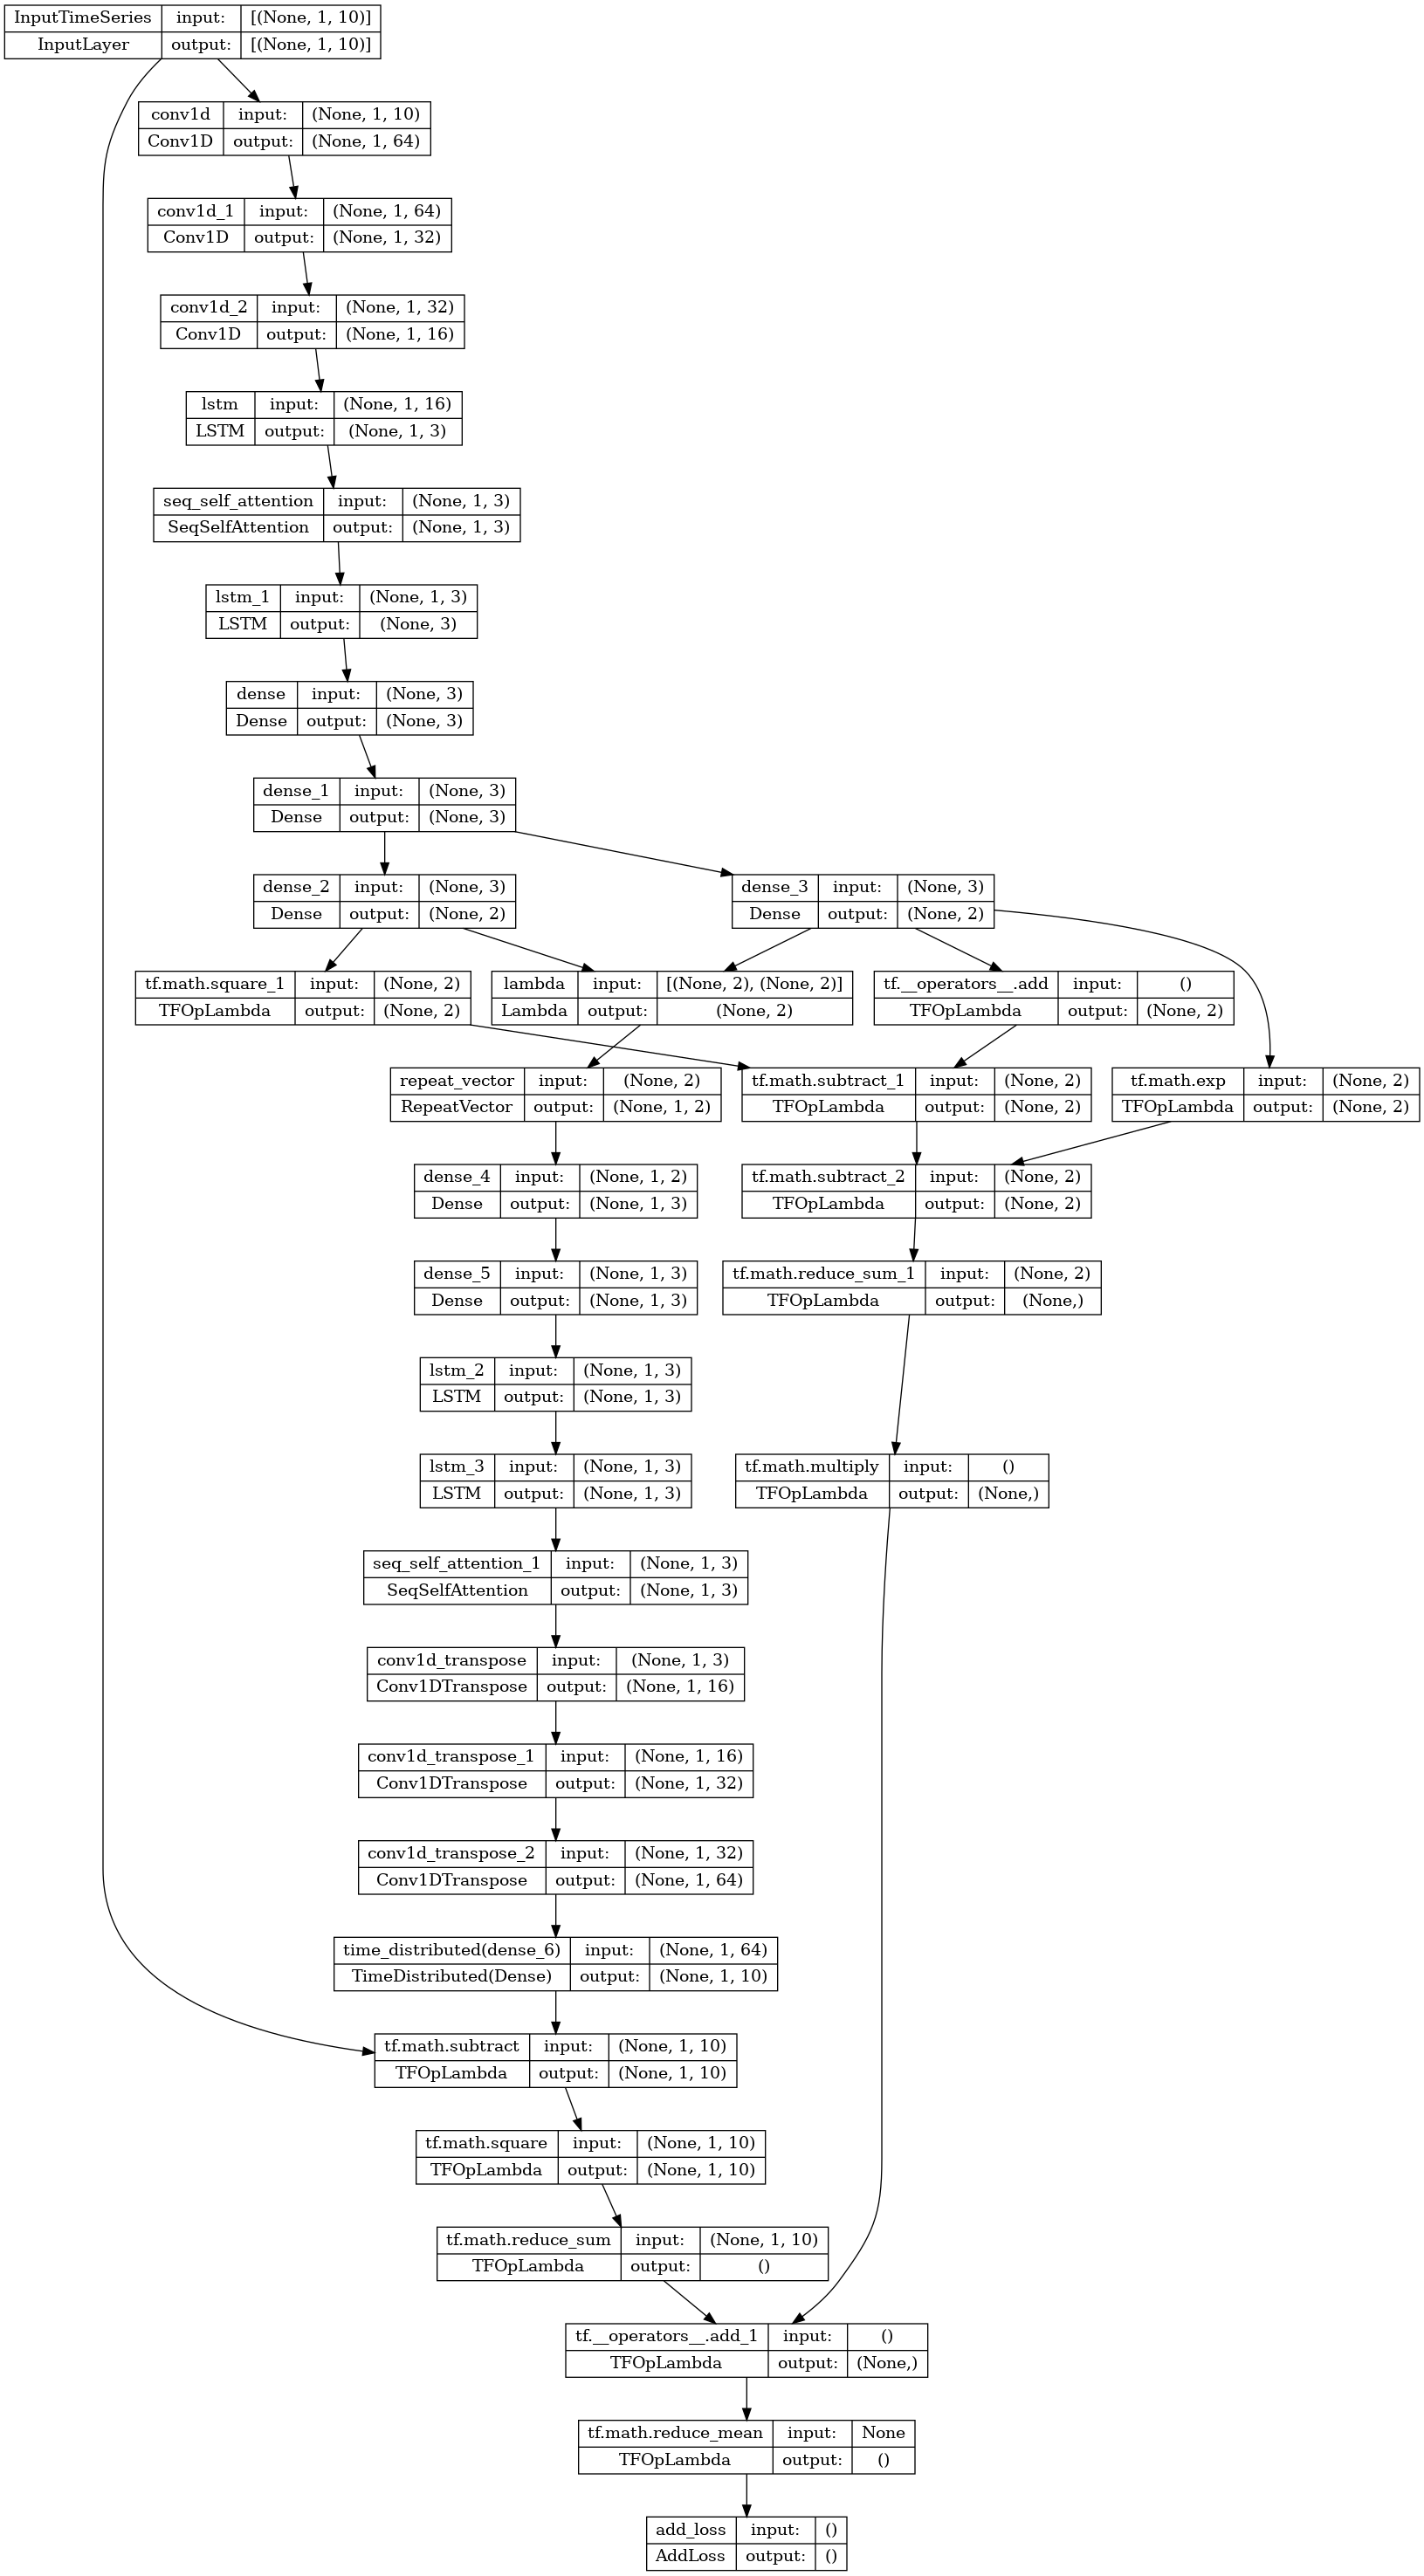

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_shapes.png', show_shapes=True)

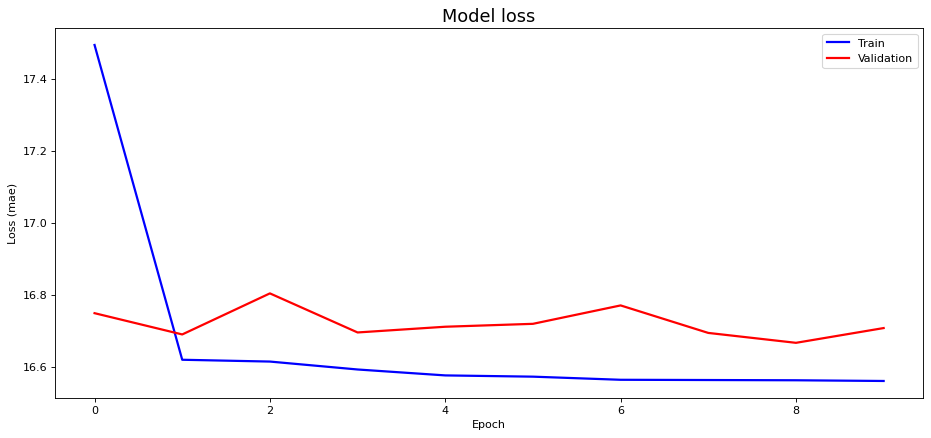

In [35]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [36]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [37]:
X_test.shape

(14852, 1, 10)

In [38]:
valid_x_predictions = model.predict(X_test)
mse = np.mean(np.power(flatten(X_test) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test.tolist()})

465/465 [==============================] - 3s 6ms/step


In [39]:
error_df

,reconstruction_error,true_class
0,0.061962,[[0]]
1,0.017507,[[0]]
2,0.014985,[[0]]
3,0.017547,[[0]]
4,0.575483,[[1]]
...,...,...
14847,0.195476,[[1]]
14848,0.017547,[[0]]
14849,0.681566,[[1]]
14850,0.066486,[[0]]


In [40]:
error_df['true_class'].value_counts()

[[0]]    7720
[[1]]    7132
Name: true_class, dtype: int64

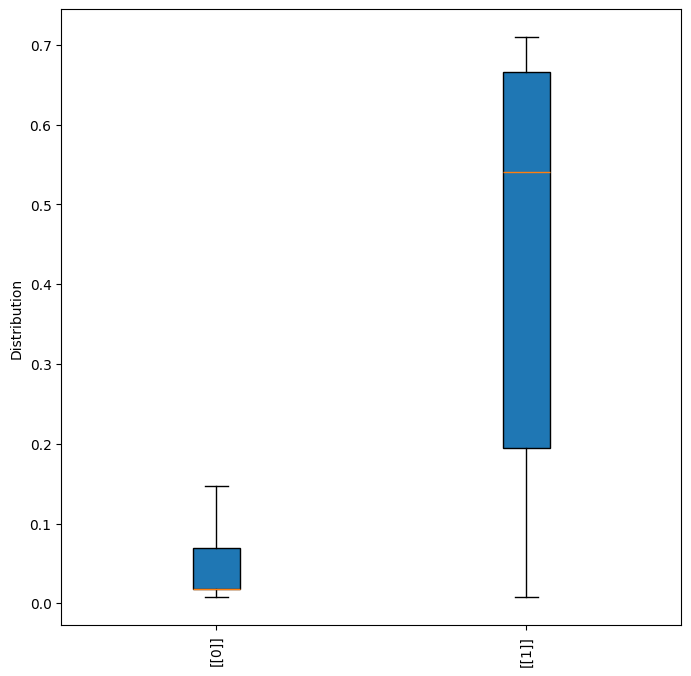

In [41]:
import matplotlib.pyplot as plt

# 데이터프레임 준비
true_class = error_df['true_class'].astype(str)
reconstruction_error = error_df['reconstruction_error']

# 박스 플롯 그리기
plt.figure(figsize=(8, 8))
plt.boxplot(
    [reconstruction_error[true_class == cls] for cls in sorted(true_class.unique())],
    labels=sorted(true_class.unique()),
    showfliers=False,
    vert=True,
    patch_artist=True
)

plt.ylabel('Distribution')
plt.xticks(rotation=90)
plt.show()


In [42]:
print(error_df)

       reconstruction_error true_class
0                  0.061962      [[0]]
1                  0.017507      [[0]]
2                  0.014985      [[0]]
3                  0.017547      [[0]]
4                  0.575483      [[1]]
...                     ...        ...
14847              0.195476      [[1]]
14848              0.017547      [[0]]
14849              0.681566      [[1]]
14850              0.066486      [[0]]
14851              0.285411      [[1]]

[14852 rows x 2 columns]


In [43]:
# Flatten the 'true_class' column to remove the nested list structure
error_df['true_class'] = error_df['true_class'].apply(lambda x: x[0][0] if isinstance(x, list) else x)

# Ensure 'reconstruction_error' is of type float
error_df['reconstruction_error'] = error_df['reconstruction_error'].astype(float)

print(error_df)


       reconstruction_error  true_class
0                  0.061962           0
1                  0.017507           0
2                  0.014985           0
3                  0.017547           0
4                  0.575483           1
...                     ...         ...
14847              0.195476           1
14848              0.017547           0
14849              0.681566           1
14850              0.066486           0
14851              0.285411           1

[14852 rows x 2 columns]


In [54]:
# 그래프 보고 threshold 결정
threshold = 0.16

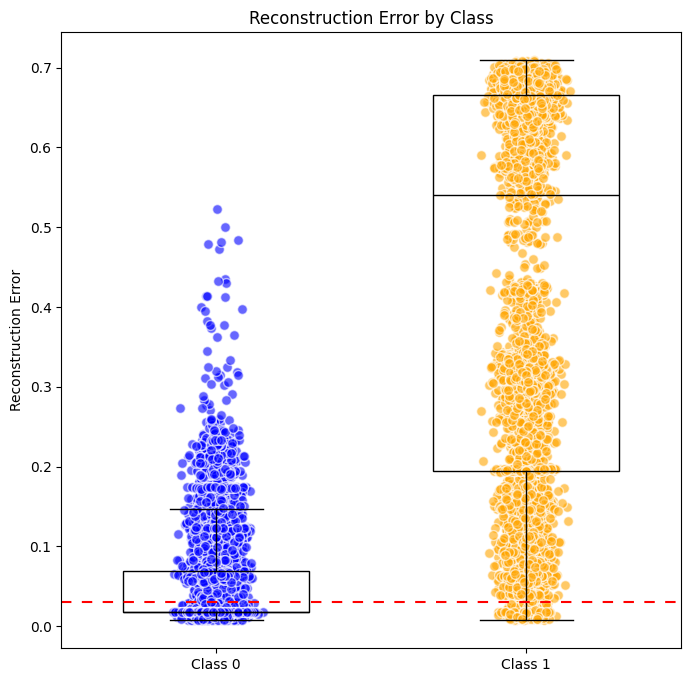

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for plotting
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Create a swarm plot equivalent using scatter plot
x_0 = np.random.normal(1, 0.04, size=len(true_class_0))  # Add jitter to x-axis for class 0
x_1 = np.random.normal(2, 0.04, size=len(true_class_1))  # Add jitter to x-axis for class 1

ax.scatter(x_0, true_class_0, color='blue', alpha=0.6, label='Class 0', edgecolor='w', s=50)
ax.scatter(x_1, true_class_1, color='orange', alpha=0.6, label='Class 1', edgecolor='w', s=50)

# Create boxplots
ax.boxplot([true_class_0, true_class_1], positions=[1, 2], widths=0.6, patch_artist=True, 
           showfliers=False, boxprops=dict(facecolor='None', color='black'),
           medianprops=dict(color='black'), whiskerprops=dict(color='black'))

# Set x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Class 0', 'Class 1'])

# Add a horizontal line at the threshold
ax.axhline(y=0.03, xmin=0.0, xmax=1, dashes=(5, 5), color='red')

# Set labels and title
ax.set_ylabel('Reconstruction Error')
ax.set_title('Reconstruction Error by Class')

plt.show()


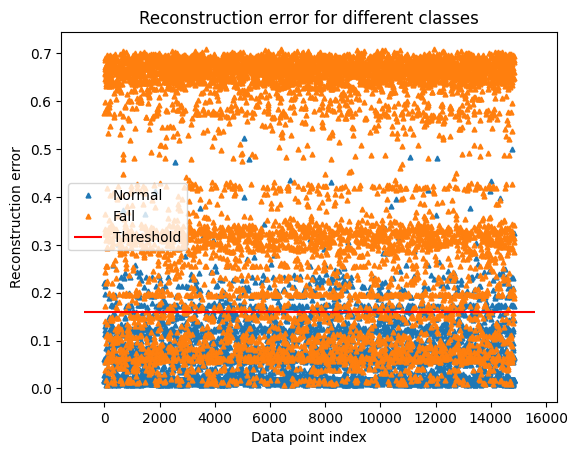

In [56]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='^', ms=3.5, linestyle='',
            label= "Normal" if name == 0 else "Fall")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

<Figure size 800x800 with 0 Axes>

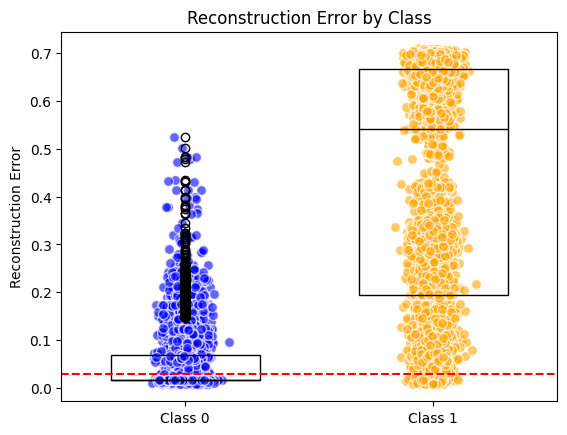

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data
true_class_0 = error_df[error_df['true_class'] == 0]['reconstruction_error']
true_class_1 = error_df[error_df['true_class'] == 1]['reconstruction_error']

# Create the figure and axes
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()

# Create a swarm plot equivalent using scatter plot
x_0 = np.random.normal(1, 0.04, size=len(true_class_0))  # Add jitter to x-axis for class 0
x_1 = np.random.normal(2, 0.04, size=len(true_class_1))  # Add jitter to x-axis for class 1

ax.scatter(x_0, true_class_0, color='blue', alpha=0.6, label='Class 0', edgecolor='w', s=50)
ax.scatter(x_1, true_class_1, color='orange', alpha=0.6, label='Class 1', edgecolor='w', s=50)

# Create boxplots
ax.boxplot([true_class_0, true_class_1], positions=[1, 2], widths=0.6, patch_artist=True, 
           showcaps=False, boxprops=dict(facecolor='None', color='black'),
           medianprops=dict(color='black'), whiskerprops=dict(color='black', linewidth=0))

# Set x-axis labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['Class 0', 'Class 1'])

# Add a horizontal line at the threshold
plt.axhline(y=0.03, xmin=0.0, xmax=1.0, color='red', linestyle='--')

# Set labels and title
ax.set_ylabel('Reconstruction Error')
ax.set_title('Reconstruction Error by Class')

plt.show()


<Figure size 1200x1200 with 0 Axes>

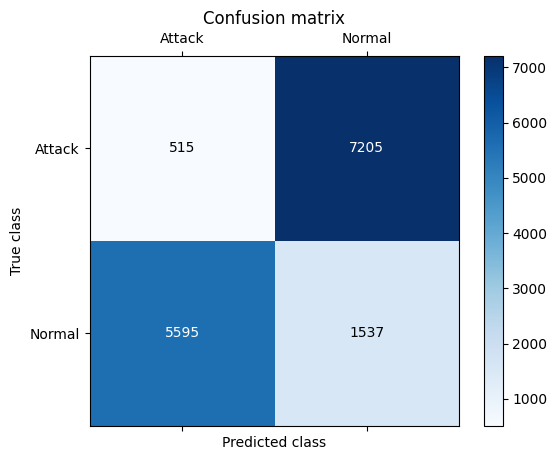

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already defined LABELS, threshold, and y_pred

LABELS = ["Attack", "Normal"]

y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# Create the figure and axis
plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()

# Plot the confusion matrix using imshow
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

# Add color bar
plt.colorbar(cax)

# Set the labels for the axes
ax.set_xticks(np.arange(len(LABELS)))
ax.set_yticks(np.arange(len(LABELS)))

ax.set_xticklabels(LABELS)
ax.set_yticklabels(LABELS)

# Set labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix')

# Annotate the confusion matrix with the counts
for i in range(len(LABELS)):
    for j in range(len(LABELS)):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()


In [58]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

precision, recall, f1,_ = precision_recall_fscore_support(y_test,y_pred,average='binary')
print ('Accuracy Score :',accuracy_score(error_df.true_class, y_pred) )
print ('Precision :',precision )
print ('Recall :',recall )
print ('F1 :',f1 )

Accuracy Score : 0.1381632103420415
Precision : 0.17581789064287348
Recall : 0.2155075715086932
F1 : 0.19364999370039057


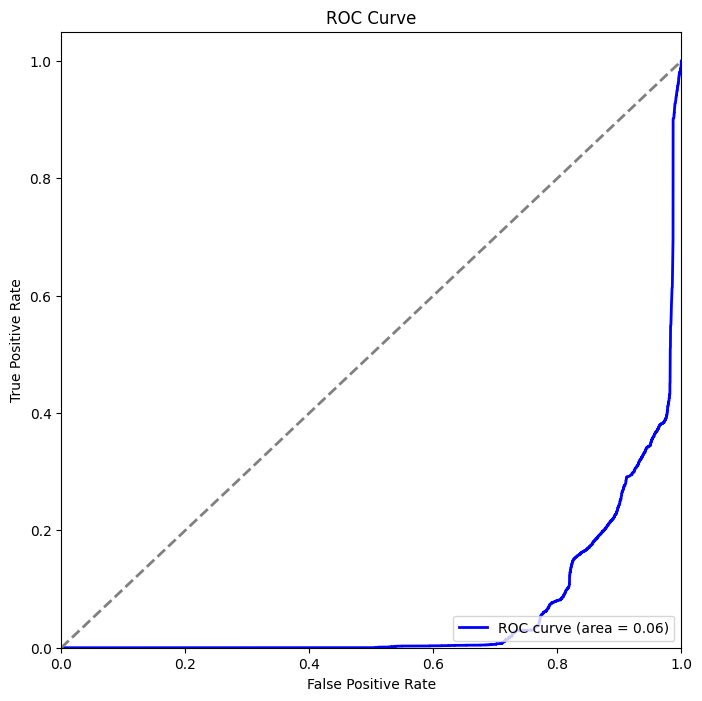

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Extract true labels and reconstruction errors from the error_df DataFrame
true_labels = error_df['true_class'].values
reconstruction_errors = error_df['reconstruction_error'].values

# Calculate FPR, TPR, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, reconstruction_errors, pos_label=0)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [51]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test and reconstruction_error have been defined
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ValueError: unknown format is not supported

In [52]:
# If error_df.true_class is a nested structure, flatten it
y_test = error_df.true_class.apply(lambda x: int(x[0][0]) if isinstance(x, list) else int(x))

# Ensure y_pred is a list of integers
y_pred = [0 if e > threshold else 1 for e in error_df.reconstruction_error.values]

# Now calculate the metrics
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy Score: 0.1425397252895233
Precision: 0.20180947312400213
Recall: 0.26584408300616935
F1 Score: 0.2294427300780541


In [53]:
# Convert nested lists or arrays to flat integers
y_test = error_df['true_class'].apply(lambda x: int(x[0][0]) if isinstance(x, list) else int(x)).values

# Ensure that y_pred is also a flat array of integers
y_pred = np.array([0 if e > threshold else 1 for e in error_df.reconstruction_error.values], dtype=int)
